In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from acquire import get_telco_data
from prepare import prep_telco
from prepare import split

In [2]:
df = get_telco_data()


In [3]:
df.head()


,Unnamed: 0,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0,2,1,1,0003-MKNFE,Male,0,No,No,9,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)
2,2,1,1,1,0015-UOCOJ,Female,1,No,No,7,...,No,No,No,Yes,48.2,340.35,No,Month-to-month,DSL,Electronic check
3,3,1,1,1,0023-HGHWL,Male,1,No,No,1,...,No,No,No,Yes,25.1,25.1,Yes,Month-to-month,DSL,Electronic check
4,4,3,1,1,0032-PGELS,Female,0,Yes,Yes,1,...,No,No,No,No,30.5,30.5,Yes,Month-to-month,DSL,Bank transfer (automatic)


In [4]:
df = prep_telco(df)

In [5]:
df.head()

,senior_citizen,tenure,monthly_charges,total_charges,male,partner,dependents,phone_service,multiple_lines,no_internet_service,...,churn,one_year,two_year,fiber_optic,credit_card,electric_check,mailed_check,online_backup,live_alone,new_customer
0,0,9,59.9,542.40,1,0,0,1,1,0,...,0,0,0,0,0,0,1,0,True,False
1,0,9,69.4,571.45,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,False,False
2,1,7,48.2,340.35,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,True,False
3,1,1,25.1,25.10,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,True,True
4,0,1,30.5,30.50,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,False,True


In [6]:
train, validate, test = split(df)

In [7]:
train. head()

,senior_citizen,tenure,monthly_charges,total_charges,male,partner,dependents,phone_service,multiple_lines,no_internet_service,...,churn,one_year,two_year,fiber_optic,credit_card,electric_check,mailed_check,online_backup,live_alone,new_customer
6058,0,58,19.55,1108.80,1,1,1,1,0,1,...,0,1,0,0,0,1,0,0,False,False
4085,1,17,92.55,1614.70,0,1,0,1,1,0,...,0,0,0,1,0,1,0,0,False,False
3497,0,27,94.55,2724.60,0,0,0,1,1,0,...,1,0,0,1,0,0,1,0,True,False
4271,1,37,76.25,2841.55,0,0,0,1,1,0,...,1,0,0,1,0,1,0,0,True,False
2672,0,7,73.60,520.00,1,0,0,1,1,0,...,1,0,0,1,0,1,0,0,True,False


In [8]:
train.shape

(3943, 26)

# Explore the Target

In [9]:
train.churn.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

Text(0.5, 0, 'Churned')

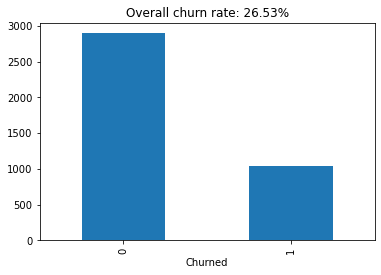

In [10]:
train.churn.value_counts().sort_index().plot.bar()
churn_rate = train.churn.mean()
plt.title(f"Overall churn rate: {churn_rate:.2%}")
plt.xlabel('Churned')

In [11]:
list(train.columns)

['senior_citizen',
 'tenure',
 'monthly_charges',
 'total_charges',
 'male',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'no_internet_service',
 'online_security',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless',
 'churn',
 'one_year',
 'two_year',
 'fiber_optic',
 'credit_card',
 'electric_check',
 'mailed_check',
 'online_backup',
 'live_alone',
 'new_customer']

## Univariate Stats

In [12]:
import explore

In [13]:
cat_vars = ['churn', 'senior_citizen', 'male', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'no_internet_service', 'online_security', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless', 'one_year', 'two_year', 'fiber_optic', 'credit_card', 'electric_check', 'mailed_check', 'online_backup', 'live_alone', 'new_customer']
quant_vars = ['tenure', 'monthly_charges', 'total_charges']

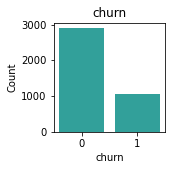

   churn  Count  Percent
0      0   2897    73.47
1      1   1046    26.53
_________________________________________________________________


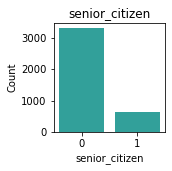

   senior_citizen  Count  Percent
0               0   3316     84.1
1               1    627     15.9
_________________________________________________________________


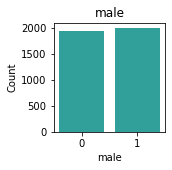

   male  Count  Percent
1     1   1996    50.62
0     0   1947    49.38
_________________________________________________________________


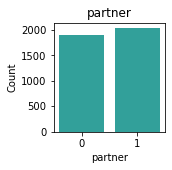

   partner  Count  Percent
0        1   2034    51.59
1        0   1909    48.41
_________________________________________________________________


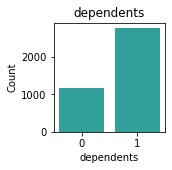

   dependents  Count  Percent
0           1   2775    70.38
1           0   1168    29.62
_________________________________________________________________


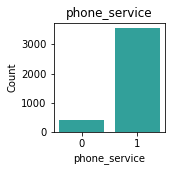

   phone_service  Count  Percent
1              1   3550    90.03
0              0    393     9.97
_________________________________________________________________


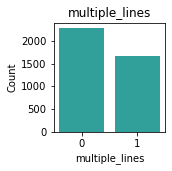

   multiple_lines  Count  Percent
0               0   2276    57.72
1               1   1667    42.28
_________________________________________________________________


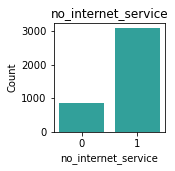

   no_internet_service  Count  Percent
0                    1   3090    78.37
1                    0    853    21.63
_________________________________________________________________


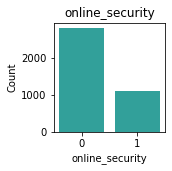

   online_security  Count  Percent
0                0   2817    71.44
1                1   1126    28.56
_________________________________________________________________


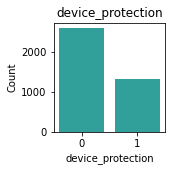

   device_protection  Count  Percent
0                  0   2602    65.99
1                  1   1341    34.01
_________________________________________________________________


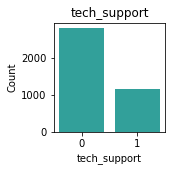

   tech_support  Count  Percent
0             0   2784    70.61
1             1   1159    29.39
_________________________________________________________________


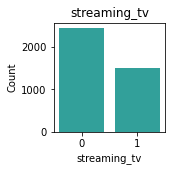

   streaming_tv  Count  Percent
0             0   2441    61.91
1             1   1502    38.09
_________________________________________________________________


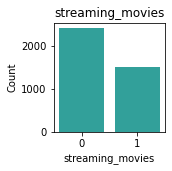

   streaming_movies  Count  Percent
0                 0   2421     61.4
1                 1   1522     38.6
_________________________________________________________________


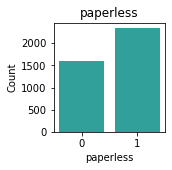

   paperless  Count  Percent
1          1   2341    59.37
0          0   1602    40.63
_________________________________________________________________


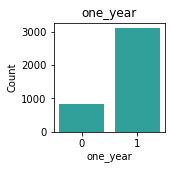

   one_year  Count  Percent
0         1   3109    78.85
1         0    834    21.15
_________________________________________________________________


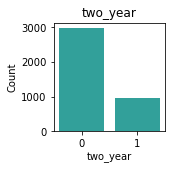

   two_year  Count  Percent
0         0   2980    75.58
1         1    963    24.42
_________________________________________________________________


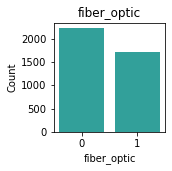

   fiber_optic  Count  Percent
0            0   2227    56.48
1            1   1716    43.52
_________________________________________________________________


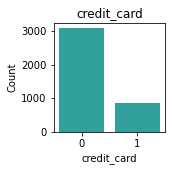

   credit_card  Count  Percent
0            0   3083    78.19
1            1    860    21.81
_________________________________________________________________


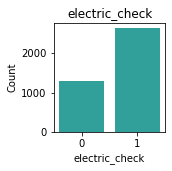

   electric_check  Count  Percent
0               1   2636    66.85
1               0   1307    33.15
_________________________________________________________________


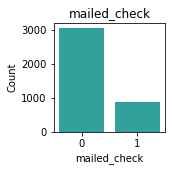

   mailed_check  Count  Percent
0             0   3049    77.33
1             1    894    22.67
_________________________________________________________________


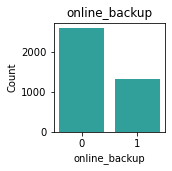

   online_backup  Count  Percent
0              0   2605    66.07
1              1   1338    33.93
_________________________________________________________________


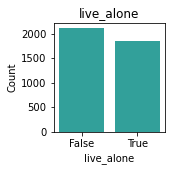

       live_alone  Count  Percent
False       False   2105    53.39
True         True   1838    46.61
_________________________________________________________________


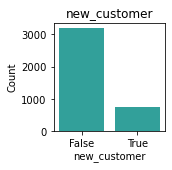

       new_customer  Count  Percent
False         False   3196    81.06
True           True    747    18.94
_________________________________________________________________


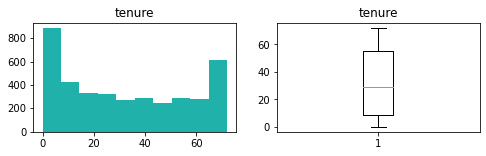

count    3943.000000
mean       32.496069
std        24.489717
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64


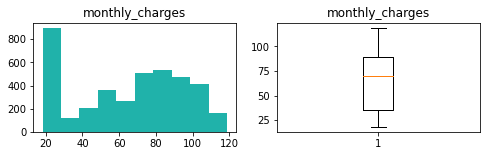

count    3943.000000
mean       64.511299
std        29.956369
min        18.250000
25%        35.500000
50%        70.150000
75%        89.550000
max       118.750000
Name: monthly_charges, dtype: float64


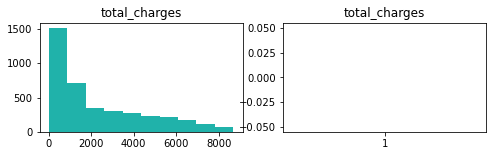

count    3935.000000
mean     2272.983926
std      2241.191111
min        18.800000
25%       421.250000
50%      1398.600000
75%      3776.975000
max      8684.800000
Name: total_charges, dtype: float64


In [14]:
explore.explore_univariate(train, cat_vars, quant_vars)


### Takeaways

- only 26% of customers have churned, baseline will be that customers have not churned

- largest concentration of customers have less than 5 months in their tenure


## Bivariate Stats

In [15]:
print(cat_vars)
print(quant_vars)

['churn', 'senior_citizen', 'male', 'partner', 'dependents', 'phone_service', 'multiple_lines', 'no_internet_service', 'online_security', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'paperless', 'one_year', 'two_year', 'fiber_optic', 'credit_card', 'electric_check', 'mailed_check', 'online_backup', 'live_alone', 'new_customer']
['tenure', 'monthly_charges', 'total_charges']


In [16]:
cat_vars = cat_vars[1:]
# remove target variable from list

In [17]:
explore.explore_bivariate(train, 'churn', cat_vars, quant_vars)

senior_citizen 
_____________________



KeyError: 'survived'